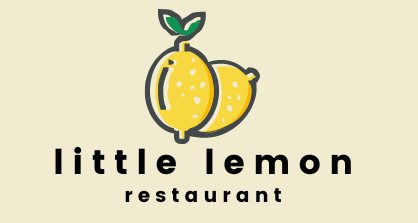

In [1]:
# import librairies needed for project

import mysql.connector as connector
from pandas import DataFrame

In [2]:
# initiate connection to database
connection = connector.connect(
    host="127.0.0.1",
    port=3306,
    user="coursera",
    password="01234",
    auth_plugin='mysql_native_password',
    database="littlelemondb")

In [3]:
# instantiate cursor object
cursor = connection.cursor()

In [4]:
# create query to display all tables in LittleLemonDB
show_tables_query = "SHOW tables"
cursor.execute(show_tables_query)

# print query results
results = cursor.fetchall()
print(results)

[('bookings',), ('courses',), ('customers',), ('deliveries',), ('desserts',), ('drinks',), ('guest_tables',), ('menus',), ('orders',), ('ordersview',), ('sides',), ('staff',), ('starters',)]


In [7]:
# create query to identify all customers with orders above $60
custy_over_60_query = "SELECT orders.cost, CONCAT(customers.customer_first_name,' ',customers.customer_last_name) \
AS customer_full_name, customers.customer_id,CONCAT(customers.street_nb, customers.street_type, customers.street_name, \
customers.postcode, customers.country_code) AS customer_address FROM orders LEFT JOIN customers ON \
(customers.customer_id = orders.order_customer_id) WHERE (cost > 60) ORDER BY cost DESC"

cursor.execute(custy_over_60_query)

# print query results
results = cursor.fetchall()

df = DataFrame(results)
df.rename(columns={0: 'cost', 1: 'customer_full_name', 2: 'customer_id', 3:'customer_address'}, inplace=True)
print(df.shape[0], "customers have placed orders above $60. Top 5 customers:")
df.head()

910 customers have placed orders above $60. Top 5 customers:


,cost,customer_full_name,customer_id,customer_address
0,320.00,Fidelity Banham,68-435-7756,None
1,320.00,Nelli Myrie,54-536-6254,None
2,320.00,Othella Flood,95-643-4919,None
3,320.00,Susette O'Neil,01-169-3967,None
4,320.00,Cathleen Gooday,55-534-3489,None


In [9]:
print("All customers: \n", results)

All customers: 
 [(Decimal('320.00'), 'Fidelity Banham', '68-435-7756', None), (Decimal('320.00'), 'Nelli Myrie', '54-536-6254', None), (Decimal('320.00'), 'Othella Flood', '95-643-4919', None), (Decimal('320.00'), "Susette O'Neil", '01-169-3967', None), (Decimal('320.00'), 'Cathleen Gooday', '55-534-3489', None), (Decimal('320.00'), 'Steward Pettinger', '14-832-8262', None), (Decimal('320.00'), 'Maddie Raw', '57-497-0939', None), (Decimal('320.00'), 'Tiertza Barford', '16-815-6643', None), (Decimal('320.00'), 'Taffy Shipcott', '55-441-4945', None), (Decimal('320.00'), 'Andonis Rawling', '55-844-1489', None), (Decimal('320.00'), 'Dodi Lenglet', '04-729-3719', None), (Decimal('320.00'), 'Locke Janaway', '79-082-9805', None), (Decimal('320.00'), 'Raye Fyldes', '04-242-3472', None), (Decimal('320.00'), 'Sindee Drynan', '13-549-8164', None), (Decimal('320.00'), 'Kym Lepard', '35-231-9391', None), (Decimal('320.00'), 'Virginie Lammas', '19-848-0069', None), (Decimal('320.00'), "Lawrence O'C

In [ ]:
# close the connection
connection.close()